# Performance of Julia 
### Exemplary Problem: Numerical solution of logistic differential equation 
$\frac{\partial U(t)}{\partial t} = U(t)(1-U(t))$ 
 
Strategy: 
Transform into discrete sequence and calculate the single steps for sufficient small time steps $\Delta t$.

$U(t+\Delta t) =U(t)+ U(t)(1-U(t))\Delta t $

First step: Import neccesary packages

In [1]:
using Plots
using BenchmarkTools

Second step: Define function for discretisation with number of steps N as input argument

In [2]:
function julia_logistic(N,dt,u)
    @fastmath @inbounds begin 
        # Parameters
        u0 = 1e-5
        # Right hand side function
        f(U)= U*(1.0-U)
        # Discretization
        # Time stepping
        u[1] = u0
        for k = 1:(N-1)
            u[k+1] = u[k] + dt*f(u[k])
        end
        return(u)
    end
end

julia_logistic (generic function with 1 method)

Third step: Visualize the problem, so see if everthing works as planned  

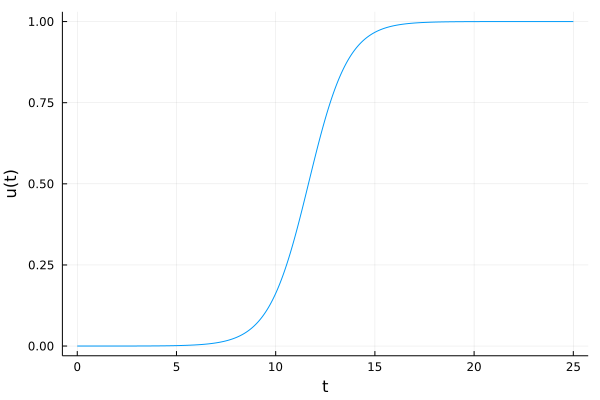

In [3]:
N = 1000
T= collect(LinRange(0.0,25.0,N))
u = zeros(1000)
U = julia_logistic(1000,25/N,u)
plot(
    T,
    U, 
    xlabel = "t",
    ylabel ="u(t)",
    label ="",
    )

Fourth step: Benchmark the function 

In [4]:
@benchmark julia_logistic(1000,25/1000,u)

BenchmarkTools.Trial: 10000 samples with 10 evaluations.
 Range (min … max):  1.864 μs …   4.323 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.874 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   2.000 μs ± 245.125 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▁ ▂▂    ▁  ▁   ▂  ▁▁  ▁   ▁▁  ▂▄   ▃▂              ▁     ▁ ▁
  █████▇█▅▄█▄▄██▅██▁▃██▃▄██▁▄██▁▁██▃▃▁██▁▁▃█▇▁▃▁▇▆▁▁▁▃█▅▁▁▁▃█ █
  1.86 μs      Histogram: log(frequency) by time      2.78 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.